In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
dataset_path = r'C:\Users\Hp\Downloads\VW_AI\dataset'
img_size = (128, 128)
batch_size = 32

# Define data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path + '\\train\\',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8 images belonging to 2 classes.


In [3]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    dataset_path + '\\validation\\',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8 images belonging to 2 classes.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model 
history = model.fit( 
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15, 
    validation_data=val_generator,
    validation_steps=len(val_generator))

        

Epoch 1/15


1/1 [==============================] - 2s 2s/step - loss: 0.7189 - accuracy: 0.3750 - val_loss: 0.6845 - val_accuracy: 0.7500
Epoch 2/15
1/1 [==============================] - 1s 744ms/step - loss: 0.7050 - accuracy: 0.5000 - val_loss: 0.6776 - val_accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 1s 540ms/step - loss: 0.6936 - accuracy: 0.6250 - val_loss: 0.6679 - val_accuracy: 0.7500
Epoch 4/15
1/1 [==============================] - 0s 479ms/step - loss: 0.6358 - accuracy: 0.6250 - val_loss: 0.6639 - val_accuracy: 0.7500
Epoch 5/15
1/1 [==============================] - 1s 596ms/step - loss: 0.6567 - accuracy: 0.6250 - val_loss: 0.6583 - val_accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 1s 668ms/step - loss: 0.5775 - accuracy: 0.8750 - val_loss: 0.6516 - val_accuracy: 0.7500
Epoch 7/15
1/1 [==============================] - 1s 507ms/step - loss: 0.5184 - accuracy: 0.8750 - val_loss: 0.6458 - val_accuracy: 0.7500
Epoch 8/15
1/1 [=====

In [7]:
model.evaluate(val_generator)

1/1 [==============================] - 0s 197ms/step - loss: 0.6847 - accuracy: 0.6250


[0.6847184896469116, 0.625]

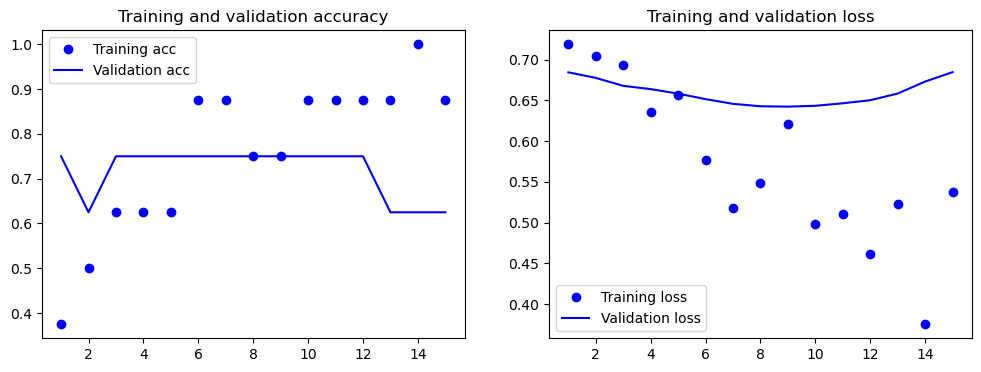

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 220ms/step - loss: 0.6847 - accuracy: 0.6250
Validation Accuracy: 62.50%
